<a href="https://colab.research.google.com/github/pablillo77/mscfava/blob/main/PCA_Shape_Modes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar los datos
#df = pd.read_csv("/content/Mediciones procesadas - Sheet4.csv")



In [ ]:
# Carga de la planilla
ID_planilla = '1_-l829ejbdEMCD9XwrDsxcei9nvGnwKE0lh0XZ2jLOQ'

URL = f'https://docs.google.com/spreadsheets/d/{ID_planilla}/gviz/tq?tqx=out:csv&sheet='

In [ ]:
# Generamos el dataframe
df_mediciones = pd.read_csv(URL+'DatosLimpios')
df_mediciones.index = df_mediciones['Paciente']


In [ ]:
df = df_mediciones.loc[:, :'Beta']
df.drop(['Paciente', 'dc', 'Ángulo Aneurisma','Ángulo renal','H'],axis=1, inplace=True)
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Dneck1,26.0,2.299231,0.433303,1.52,2.0700,2.270,2.4825,3.14
Dneck2,26.0,2.852308,0.399583,2.24,2.5775,2.710,3.1175,3.82
Dmax,26.0,5.699615,0.846364,4.09,5.1150,5.505,6.2900,7.31
Dmin,26.0,3.006538,1.073812,1.73,2.2850,2.620,3.4175,5.83
Dsellado1,26.0,1.553846,0.514355,0.70,1.1250,1.470,1.9350,2.70
Dsellado2,26.0,1.536538,0.517579,0.82,1.2000,1.440,1.6850,3.20
Lneck,26.0,3.157308,1.165437,1.50,2.4300,2.830,3.6500,6.54
Hneck,26.0,2.567692,0.967852,0.80,1.9650,2.470,3.1525,4.80
L,26.0,9.732308,2.636477,6.44,8.3100,9.115,9.8800,17.20
L1,26.0,6.814231,3.675541,3.38,4.6500,6.110,7.3500,22.00


In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalado de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [ ]:
df.columns

Index(['Dneck1', 'Dneck2', 'Dmax', 'Dmin', 'Dsellado1', 'Dsellado2', 'Lneck',
       'Hneck', 'L', 'L1', 'L2', 'H', 'Hb', 'dc', 'd', 'Ángulo renal', 'Alfa',
       'Ángulo Aneurisma', 'Beta', 'V[cm3]', 'Vlum[cm3]', 'VILT [cm3]',
       'S [cm2]', 'Slum [cm2]', 'Gamma', 'IPR', 'Tortuosidad'],
      dtype='object')

In [ ]:
# Escalado de datos

scaler = StandardScaler(with_mean=True, with_std=True)
scaled_data = scaler.fit_transform(df)

# PCA
pca = PCA()
pca.fit(scaled_data)

# Obtener las componentes principales
principal_components = pca.transform(scaled_data)

# Raíz cuadrada de los autovalores (raices de lambda_i)
eigenvalues = pca.explained_variance_
sqrt_eigenvalues = np.sqrt(eigenvalues)

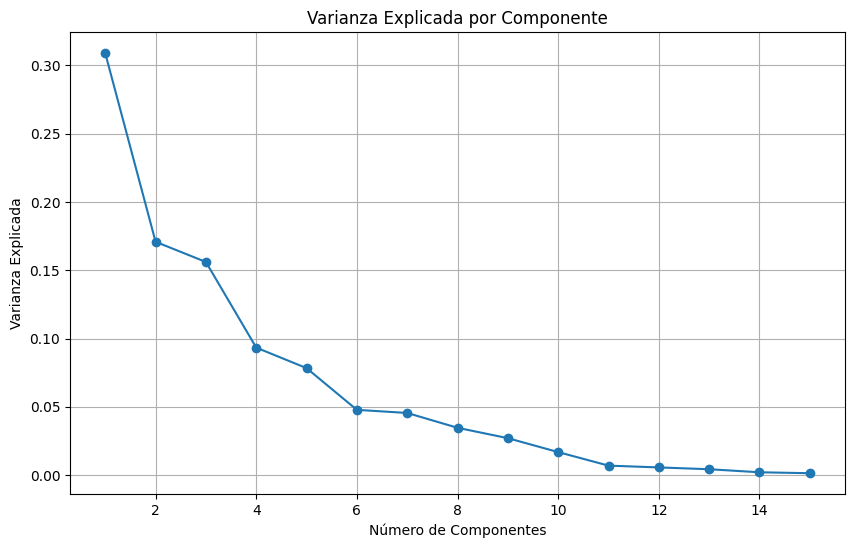

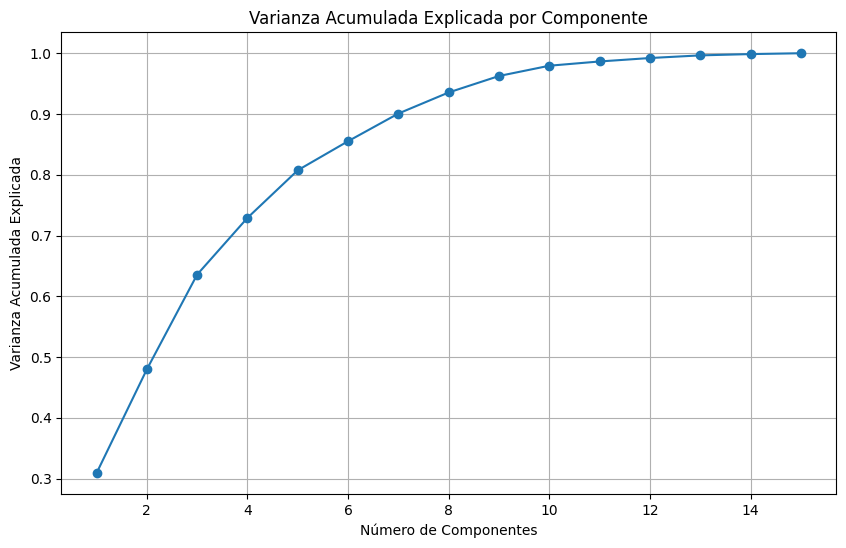

In [ ]:
# Paso 6: Visualizar la varianza explicada por los componentes
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente')
plt.grid(True)
plt.show()

# Visualizar la varianza acumulada explicada
cumulative_explained_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada Explicada por Componente')
plt.grid(True)
plt.show()

In [ ]:
# Variación en la dirección de las componentes principales
# k = ±2
k_values = [-2, 2]

# Lista para almacenar los datos modificados
modified_data_list1 = []
modified_data_list2 = []
modified_data_list3 = []

# Iterar a través de los valores de k
for k in k_values:
    # Variación a lo largo de las PCs
    variation1 = k * sqrt_eigenvalues[0] * pca.components_[0, :] #PC1
    variation2 = k * sqrt_eigenvalues[1] * pca.components_[1, :] #PC2
    variation3 = k * sqrt_eigenvalues[2] * pca.components_[2, :] #PC3

    # Aplicar la variación a los datos originales escalados
    modified_scaled_data1 = scaled_data + variation1
    modified_scaled_data2 = scaled_data + variation2
    modified_scaled_data3 = scaled_data + variation3


    # Revertir la estandarización para obtener los datos en su escala original
    modified_data1 = scaler.inverse_transform(modified_scaled_data1)
    modified_data2 = scaler.inverse_transform(modified_scaled_data2)
    modified_data3 = scaler.inverse_transform(modified_scaled_data3)

    modified_data_list1.append(modified_data1)
    modified_data_list2.append(modified_data2)
    modified_data_list3.append(modified_data3)

# Visualizar las variaciones en las características originales
# ±2 sdt de PC1, PC2 y PC3

df_modified_minus_pc1 = pd.DataFrame(modified_data_list1[0], columns=df.columns)
df_modified_plus_pc1 = pd.DataFrame(modified_data_list1[1], columns=df.columns)
df_modified_minus_pc2 = pd.DataFrame(modified_data_list2[0], columns=df.columns)
df_modified_plus_pc2 = pd.DataFrame(modified_data_list2[1], columns=df.columns)
df_modified_minus_pc3 = pd.DataFrame(modified_data_list3[0], columns=df.columns)
df_modified_plus_pc3 = pd.DataFrame(modified_data_list3[1], columns=df.columns)

# Mostrar algunas filas de los resultados, datos modificados en la escala original

print("Variación en la dirección negativa de PC1 (k = -2):")
print(df_modified_minus_pc1.head())

print("\nVariación en la dirección positiva de PC1 (k = 2):")
print(df_modified_plus_pc1.head())




Variación en la dirección negativa de PC1 (k = -1):
    Dneck1    Dneck2      Dmax      Dmin  Dsellado1  Dsellado2    Lneck  \
0  3.00155  2.741577  4.123593  0.719108   1.658773   1.655732  4.06622   
1  2.97155  3.251577  3.883593  1.759108   1.268773   1.595732  3.39622   
2  2.30155  3.101577  5.903593  1.209108   1.288773   1.385732  2.64622   
3  1.69155  2.291577  3.943593  0.789108   1.608773   1.385732  1.86622   
4  2.68155  3.341577  4.743593  1.359108   1.658773   1.725732  4.76622   

      Hneck         L        L1        L2        Hb         d       Alfa  \
0  3.500669  3.386825  0.939768  3.131434  4.954657  3.224168   9.463107   
1  2.890669  5.386825  1.439768  1.971434  5.824657  5.724168  17.963107   
2  2.650669  8.186825  1.939768  1.841434  5.724657  7.424168  32.963107   
3  1.610669  7.516825  1.899768  5.531434  4.424657  3.524168  -3.636893   
4  4.660669  3.086825  1.039768  3.431434  4.324657  3.724168   2.963107   

       Beta  
0  -6.28168  
1  26.91832 

In [ ]:
# Calculamos la media y desviación estándar de df
df_stats = df.describe().loc[['mean', 'std']].T

# Calculamos la media y desviación estándar de df_modified_plus_pc1 y df_modified_minus_pc1
df_modified_plus_pc1_stats = df_modified_plus_pc1.describe().loc[['mean', 'std']].T
df_modified_minus_pc1_stats = df_modified_minus_pc1.describe().loc[['mean', 'std']].T

# Calculamos la media y desviación estándar de df_modified_plus_pc2 y df_modified_minus_pc2
df_modified_plus_pc2_stats = df_modified_plus_pc2.describe().loc[['mean', 'std']].T
df_modified_minus_pc2_stats = df_modified_minus_pc2.describe().loc[['mean', 'std']].T

# Calculamos la media y desviación estándar de df_modified_plus_pc3 y df_modified_minus_pc3
df_modified_plus_pc3_stats = df_modified_plus_pc3.describe().loc[['mean', 'std']].T
df_modified_minus_pc3_stats = df_modified_minus_pc3.describe().loc[['mean', 'std']].T

# Combinamos todos los DataFrames en uno solo
resumen_stats = pd.concat([df_stats,
                           df_modified_plus_pc1_stats.add_suffix('_PC1+1std'),
                           df_modified_minus_pc1_stats.add_suffix('_PC1-1std'),
                           df_modified_plus_pc2_stats.add_suffix('_PC2+1std'),
                           df_modified_minus_pc2_stats.add_suffix('_PC2-1std'),
                           df_modified_plus_pc3_stats.add_suffix('_PC3+1std'),
                           df_modified_minus_pc3_stats.add_suffix('_PC3-1std')], axis=1)

# Mostramos la tabla resumen
resumen_stats.round(2)

,mean,std,mean_PC1+1std,std_PC1+1std,mean_PC1-1std,std_PC1-1std,mean_PC2+1std,std_PC2+1std,mean_PC2-1std,std_PC2-1std,mean_PC3+1std,std_PC3+1std,mean_PC3-1std,std_PC3-1std
Dneck1,2.30,0.43,2.27,0.43,2.33,0.43,2.62,0.43,1.97,0.43,2.72,0.43,1.87,0.43
Dneck2,2.85,0.40,2.80,0.40,2.90,0.40,3.06,0.40,2.64,0.40,3.20,0.40,2.51,0.40
Dmax,5.70,0.85,6.92,0.85,4.48,0.85,5.27,0.85,6.13,0.85,5.90,0.85,5.50,0.85
Dmin,3.01,1.07,4.07,1.07,1.95,1.07,2.79,1.07,3.23,1.07,4.22,1.07,1.79,1.07
Dsellado1,1.55,0.51,1.27,0.51,1.84,0.51,1.29,0.51,1.82,0.51,2.25,0.51,0.85,0.51
Dsellado2,1.54,0.52,1.35,0.52,1.72,0.52,1.23,0.52,1.84,0.52,2.37,0.52,0.70,0.52
Lneck,3.16,1.17,2.79,1.17,3.52,1.17,5.01,1.17,1.31,1.17,3.79,1.17,2.52,1.17
Hneck,2.57,0.97,2.11,0.97,3.03,0.97,4.31,0.97,0.82,0.97,2.81,0.97,2.32,0.97
L,9.73,2.64,14.55,2.64,4.92,2.64,9.01,2.64,10.46,2.64,10.45,2.64,9.02,2.64
L1,6.81,3.68,12.07,3.68,1.55,3.68,9.95,3.68,3.68,3.68,4.97,3.68,8.66,3.68


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dneck1,26.0,2.299231,0.433303,1.52,2.0700,2.270,2.4825,3.14
Dneck2,26.0,2.852308,0.399583,2.24,2.5775,2.710,3.1175,3.82
Dmax,26.0,5.699615,0.846364,4.09,5.1150,5.505,6.2900,7.31
Dmin,26.0,3.006538,1.073812,1.73,2.2850,2.620,3.4175,5.83
Dsellado1,26.0,1.553846,0.514355,0.70,1.1250,1.470,1.9350,2.70
Dsellado2,26.0,1.536538,0.517579,0.82,1.2000,1.440,1.6850,3.20
Lneck,26.0,3.157308,1.165437,1.50,2.4300,2.830,3.6500,6.54
Hneck,26.0,2.567692,0.967852,0.80,1.9650,2.470,3.1525,4.80
L,26.0,9.732308,2.636477,6.44,8.3100,9.115,9.8800,17.20
L1,26.0,6.814231,3.675541,3.38,4.6500,6.110,7.3500,22.00


In [ ]:
df_modified_plus_pc1.describe().T

,count,mean,std,min,25%,50%,75%,max
Dneck1,26.0,2.267681,0.433303,1.488450,2.038450,2.238450,2.450950,3.108450
Dneck2,26.0,2.800730,0.399583,2.188423,2.525923,2.658423,3.065923,3.768423
Dmax,26.0,6.916023,0.846364,5.306407,6.331407,6.721407,7.506407,8.526407
Dmin,26.0,4.067430,1.073812,2.790892,3.345892,3.680892,4.478392,6.890892
Dsellado1,26.0,1.265074,0.514355,0.411227,0.836227,1.181227,1.646227,2.411227
Dsellado2,26.0,1.350806,0.517579,0.634268,1.014268,1.254268,1.499268,3.014268
Lneck,26.0,2.791087,1.165437,1.133780,2.063780,2.463780,3.283780,6.173780
Hneck,26.0,2.107023,0.967852,0.339331,1.504331,2.009331,2.691831,4.339331
L,26.0,14.545483,2.636477,11.253175,13.123175,13.928175,14.693175,22.013175
L1,26.0,12.074463,3.675541,8.640232,9.910232,11.370232,12.610232,27.260232


In [ ]:
df_modified_minus_pc1.describe().T

,count,mean,std,min,25%,50%,75%,max
Dneck1,26.0,2.330781,0.433303,1.551550,2.101550,2.301550,2.514050,3.171550
Dneck2,26.0,2.903885,0.399583,2.291577,2.629077,2.761577,3.169077,3.871577
Dmax,26.0,4.483208,0.846364,2.873593,3.898593,4.288593,5.073593,6.093593
Dmin,26.0,1.945646,1.073812,0.669108,1.224108,1.559108,2.356608,4.769108
Dsellado1,26.0,1.842619,0.514355,0.988773,1.413773,1.758773,2.223773,2.988773
Dsellado2,26.0,1.722271,0.517579,1.005732,1.385732,1.625732,1.870732,3.385732
Lneck,26.0,3.523528,1.165437,1.866220,2.796220,3.196220,4.016220,6.906220
Hneck,26.0,3.028361,0.967852,1.260669,2.425669,2.930669,3.613169,5.260669
L,26.0,4.919132,2.636477,1.626825,3.496825,4.301825,5.066825,12.386825
L1,26.0,1.553999,3.675541,-1.880232,-0.610232,0.849768,2.089768,16.739768


In [ ]:
df_modified_plus_pc2.describe().T

,count,mean,std,min,25%,50%,75%,max
Dneck1,26.0,2.623770,0.433303,1.844539,2.394539,2.594539,2.807039,3.464539
Dneck2,26.0,3.061153,0.399583,2.448846,2.786346,2.918846,3.326346,4.028846
Dmax,26.0,5.268080,0.846364,3.658464,4.683464,5.073464,5.858464,6.878464
Dmin,26.0,2.785554,1.073812,1.509015,2.064015,2.399015,3.196515,5.609015
Dsellado1,26.0,1.289402,0.514355,0.435556,0.860556,1.205556,1.670556,2.435556
Dsellado2,26.0,1.233415,0.517579,0.516877,0.896877,1.136877,1.381877,2.896877
Lneck,26.0,5.008962,1.165437,3.351654,4.281654,4.681654,5.501654,8.391654
Hneck,26.0,4.312687,0.967852,2.544994,3.709994,4.214994,4.897494,6.544994
L,26.0,9.006586,2.636477,5.714279,7.584279,8.389279,9.154279,16.474279
L1,26.0,9.951037,3.675541,6.516807,7.786807,9.246807,10.486807,25.136807


In [ ]:
df_modified_minus_pc2.describe().T

,count,mean,std,min,25%,50%,75%,max
Dneck1,26.0,1.974691,0.433303,1.195461,1.745461,1.945461,2.157961,2.815461
Dneck2,26.0,2.643462,0.399583,2.031154,2.368654,2.501154,2.908654,3.611154
Dmax,26.0,6.131151,0.846364,4.521536,5.546536,5.936536,6.721536,7.741536
Dmin,26.0,3.227523,1.073812,1.950985,2.505985,2.840985,3.638485,6.050985
Dsellado1,26.0,1.818290,0.514355,0.964444,1.389444,1.734444,2.199444,2.964444
Dsellado2,26.0,1.839662,0.517579,1.123123,1.503123,1.743123,1.988123,3.503123
Lneck,26.0,1.305653,1.165437,-0.351654,0.578346,0.978346,1.798346,4.688346
Hneck,26.0,0.822698,0.967852,-0.944994,0.220006,0.725006,1.407506,3.055006
L,26.0,10.458029,2.636477,7.165721,9.035721,9.840721,10.605721,17.925721
L1,26.0,3.677424,3.675541,0.243193,1.513193,2.973193,4.213193,18.863193


In [ ]:
df_modified_plus_pc3.describe().T

,count,mean,std,min,25%,50%,75%,max
Dneck1,26.0,2.723761,0.433303,1.944531,2.494531,2.694531,2.907031,3.564531
Dneck2,26.0,3.199343,0.399583,2.587036,2.924536,3.057036,3.464536,4.167036
Dmax,26.0,5.901760,0.846364,4.292144,5.317144,5.707144,6.492144,7.512144
Dmin,26.0,4.221982,1.073812,2.945443,3.500443,3.835443,4.632943,7.045443
Dsellado1,26.0,2.252923,0.514355,1.399076,1.824076,2.169076,2.634076,3.399076
Dsellado2,26.0,2.371116,0.517579,1.654578,2.034578,2.274578,2.519578,4.034578
Lneck,26.0,3.792326,1.165437,2.135019,3.065019,3.465019,4.285019,7.175019
Hneck,26.0,2.810415,0.967852,1.042723,2.207723,2.712723,3.395223,5.042723
L,26.0,10.446947,2.636477,7.154639,9.024639,9.829639,10.594639,17.914639
L1,26.0,4.969337,3.675541,1.535107,2.805107,4.265107,5.505107,20.155107


In [ ]:
df_modified_minus_pc3.describe().T

,count,mean,std,min,25%,50%,75%,max
Dneck1,26.0,1.874700,0.433303,1.095469,1.645469,1.845469,2.057969,2.715469
Dneck2,26.0,2.505272,0.399583,1.892964,2.230464,2.362964,2.770464,3.472964
Dmax,26.0,5.497471,0.846364,3.887856,4.912856,5.302856,6.087856,7.107856
Dmin,26.0,1.791095,1.073812,0.514557,1.069557,1.404557,2.202057,4.614557
Dsellado1,26.0,0.854770,0.514355,0.000924,0.425924,0.770924,1.235924,2.000924
Dsellado2,26.0,0.701961,0.517579,-0.014578,0.365422,0.605422,0.850422,2.365422
Lneck,26.0,2.522289,1.165437,0.864981,1.794981,2.194981,3.014981,5.904981
Hneck,26.0,2.324969,0.967852,0.557277,1.722277,2.227277,2.909777,4.557277
L,26.0,9.017669,2.636477,5.725361,7.595361,8.400361,9.165361,16.485361
L1,26.0,8.659124,3.675541,5.224893,6.494893,7.954893,9.194893,23.844893


In [ ]:
pca.explained_variance_
sr=np.sqrt(pca.explained_variance_)
sr

array([2.18280523, 1.64433987, 1.28754425, 1.05052779, 0.98612258,
       0.8718426 , 0.70032415, 0.61588863, 0.54677017, 0.49203712,
       0.25696567, 0.21129572, 0.18993031])